In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2_fields_new.csv to 2_fields_new.csv


In [ ]:
df = pd.read_csv('2_fields_new.csv')

In [ ]:
df.head()#artificial dataset

,Student Name,ques_no,Response Time (in secs),Age,Gender,Previous Gpa(out of 10)
0,Ash,1,1.0,14,Male,5.0
1,Ash,2,2.0,14,Male,5.0
2,Ash,3,2.0,14,Male,5.0
3,Ash,4,1.0,14,Male,5.0
4,Ash,5,2.0,14,Male,5.0


#### Elbow method

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Previous Gpa(out of 10)','Response Time (in secs)']])
  sse.append(km.inertia_)

In [ ]:
sse

[3360.57843682,
 1408.1701182666666,
 283.1248153066667,
 149.62541476666664,
 117.54921476666667,
 85.78521476666666,
 72.6567981,
 58.9317981,
 46.431797200000005]

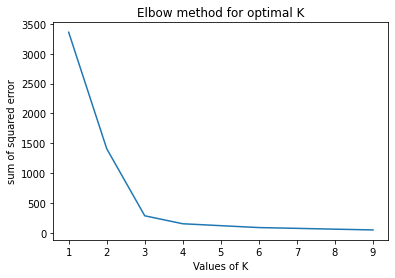

In [ ]:
plt.xlabel('Values of K')
plt.ylabel('sum of squared error')
plt.title('Elbow method for optimal K')
plt.plot(k_rng,sse)

#### we get 3 as the optimal value of K from elbow method.



#### Silhouette analysis (Method 2)

In [ ]:
sil = []
k_rng = range(2,10)

for k in k_rng:
  kmeans = KMeans(n_clusters = k).fit(df[['Age','Previous Gpa(out of 10)','Response Time (in secs)']])
  labels = kmeans.labels_
  sil.append(silhouette_score(df[['Age','Previous Gpa(out of 10)','Response Time (in secs)']], labels, metric = 'euclidean'))

In [ ]:
sil

[0.5727431923551042,
 0.7280221889196175,
 0.6493675994831186,
 0.6453837949567367,
 0.5928936667644276,
 0.602113385345444,
 0.5138701072385312,
 0.5471605729707806]

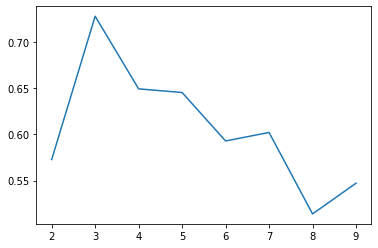

In [ ]:
plt.plot(k_rng,sil)

#### We get 3 as the optimal value from silhouette analysis